# Lesson 09 Assignment - Image Classification with CNN


## Dataset

<a href='http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'>CIFAR-10</a> dataset, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

## Instructions

Using the CIFAR-10 dataset, create a new notebook to build a TensorlLow model. Perform each of the following tasks and answer the related questions:

1. Read <a href='https://keras.io/datasets/#cifar10-small-image-classification'>CIFAR-10</a> dataset from Keras.
2. Explore data 
3. Preprocess and prepare data for classification
4. Build a TensorFlow model using a single dense hidden layer
5. Apply model to test set and evaluate accuracy
6. Perform 3 adjusts to the number of layers and activation functions to improve accuracy
7. Summarize your findings regarding the different iterations and any insights gained

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

### Load, explore, preprocess data

In [2]:
# Load
data = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = data.load_data()

In [3]:
print('Data shape')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Data shape
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


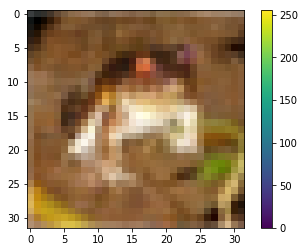

In [4]:
# Plot an image
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# Normalize by the image size
x_train, x_test = x_train / 255.0, x_test / 255.0

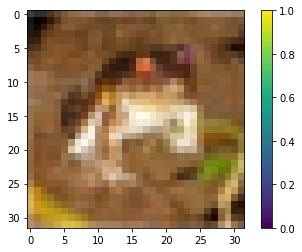

In [6]:
# Check that the scaling worked 
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


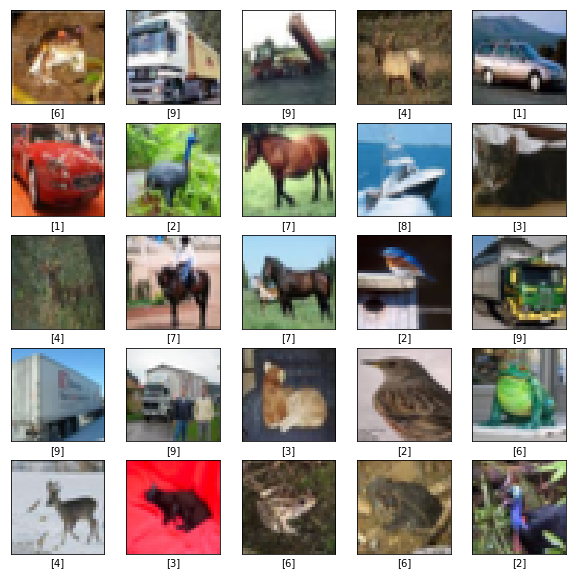

In [7]:
# See how the data looks like
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

###  Build a TensorFlow model using a single dense hidden layer

In [8]:
# Use the model configuration from the lab
model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 10s 209us/sample - loss: 1.8943 - acc: 0.3231
Epoch 2/5
50000/50000 [==============================] - 10s 191us/sample - loss: 1.7409 - acc: 0.3797
Epoch 3/5
50000/50000 [==============================] - 9s 184us/sample - loss: 1.6795 - acc: 0.4006
Epoch 4/5
50000/50000 [==============================] - 9s 185us/sample - loss: 1.6445 - acc: 0.4154
Epoch 5/5
50000/50000 [==============================] - 10s 190us/sample - loss: 1.6228 - acc: 0.4221


In [11]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 79us/sample - loss: 1.5971 - acc: 0.4366
Test accuracy: 0.4366


In [12]:
# Get predictions
predictions = model.predict(x_test)

A sample of test data with actual and predicted class and probability


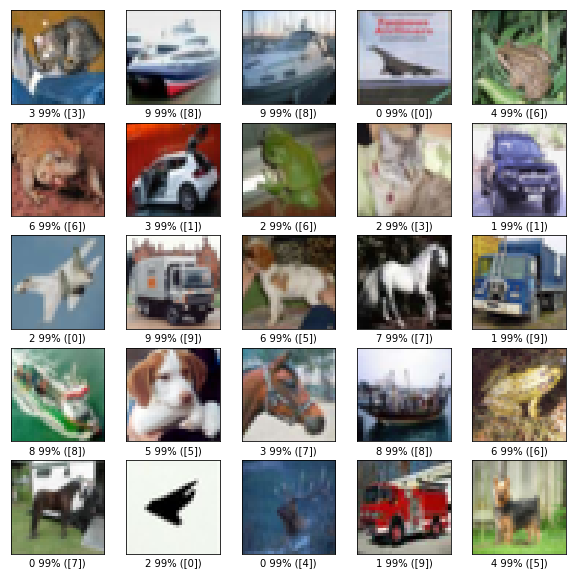

In [18]:
print('A sample of test data with actual and predicted class and probability')
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(np.argmax(predictions[i]), 100*np.max(predictions), y_test[i]))
plt.show()

### Change the number of layers and activation functions to improve accuracy

In [14]:
model1 = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=5)

test_1_loss, test_1_acc = model1.evaluate(x_test, y_test)

print('Test 1 accuracy:', test_1_acc)

Epoch 1/5
50000/50000 [==============================] - 9s 189us/sample - loss: 1.8659 - acc: 0.3206
Epoch 2/5
50000/50000 [==============================] - 10s 194us/sample - loss: 1.6868 - acc: 0.3946
Epoch 3/5
50000/50000 [==============================] - 10s 190us/sample - loss: 1.6145 - acc: 0.4217
Epoch 4/5
50000/50000 [==============================] - 9s 189us/sample - loss: 1.5719 - acc: 0.4370
Epoch 5/5
10000/10000 [==============================] - 1s 68us/sample - loss: 1.5395 - acc: 0.4562
Test 1 accuracy: 0.4562


In [15]:
model2 = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=5)

test_2_loss, test_2_acc = model1.evaluate(x_test, y_test)

print('Test 2 accuracy:', test_2_acc)

Epoch 1/5
50000/50000 [==============================] - 7s 130us/sample - loss: 1.8717 - acc: 0.3178
Epoch 2/5
50000/50000 [==============================] - 6s 121us/sample - loss: 1.7231 - acc: 0.3791
Epoch 3/5
50000/50000 [==============================] - 6s 123us/sample - loss: 1.6621 - acc: 0.4006
Epoch 4/5
50000/50000 [==============================] - 6s 121us/sample - loss: 1.6172 - acc: 0.4168
Epoch 5/5
10000/10000 [==============================] - 1s 64us/sample - loss: 1.5395 - acc: 0.4562
Test 2 accuracy: 0.4562


In [16]:
model3 = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(x_train, y_train, epochs=5)

test_3_loss, test_3_acc = model1.evaluate(x_test, y_test)

print('Test 3 accuracy:', test_3_acc)

Epoch 1/5
50000/50000 [==============================] - 10s 209us/sample - loss: 1.9181 - acc: 0.2934
Epoch 2/5
50000/50000 [==============================] - 10s 192us/sample - loss: 1.7388 - acc: 0.3738
Epoch 3/5
50000/50000 [==============================] - 9s 190us/sample - loss: 1.6636 - acc: 0.4027
Epoch 4/5
50000/50000 [==============================] - 10s 193us/sample - loss: 1.6137 - acc: 0.4217
Epoch 5/5
10000/10000 [==============================] - 1s 75us/sample - loss: 1.5395 - acc: 0.4562
Test 3 accuracy: 0.4562


In [17]:
model4 = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(264, activation=tf.nn.relu),
    keras.layers.Dense(264, activation=tf.nn.relu),
    keras.layers.Dense(264, activation=tf.nn.relu),
    keras.layers.Dense(264, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.fit(x_train, y_train, epochs=10)

test_4_loss, test_4_acc = model1.evaluate(x_test, y_test)

print('Test 4 accuracy:', test_4_acc)

Epoch 1/10
50000/50000 [==============================] - 33s 656us/sample - loss: 1.8630 - acc: 0.3194
Epoch 2/10
50000/50000 [==============================] - 33s 656us/sample - loss: 1.6938 - acc: 0.3891
Epoch 3/10
50000/50000 [==============================] - 37s 737us/sample - loss: 1.6128 - acc: 0.4203
Epoch 4/10
50000/50000 [==============================] - 40s 808us/sample - loss: 1.5623 - acc: 0.4375
Epoch 5/10
50000/50000 [==============================] - 47s 944us/sample - loss: 1.5214 - acc: 0.4514
Epoch 6/10
50000/50000 [==============================] - 37s 735us/sample - loss: 1.4818 - acc: 0.4665
Epoch 7/10
50000/50000 [==============================] - 39s 785us/sample - loss: 1.4548 - acc: 0.4781
Epoch 8/10
50000/50000 [==============================] - 38s 756us/sample - loss: 1.4301 - acc: 0.4841 - loss
Epoch 9/10
50000/50000 [==============================] - 40s 810us/sample - loss: 1.4036 - acc: 0.4946
Epoch 10/10
10000/10000 [==============================] 

### Summary

The accuracy of the model with the parameters from the lab is about 0.44. I tried changing the number of layers and using the sigmoid activation function instead of softmax in the output layer but the accuracy does not go beyond about 0.46. This is consistent with my impression from this entire course that models do not usually improve other than by a couple of percentage points compared to their most basic set of parameters.